# Metodos de aprendizaje de maquina supervisados
## Regresion Lineal.
En terminos simples la regresion lineal es un relacion continua, lineal entre datos de entradas y "etiquetas" (datos de salida). En terminos matematicos

$$ X \theta  = y .$$

Veamos como resulta este probelema en la practica, con un ejemplo.

Asuma que usted quiere vender su casa de 1000 pies cuadrados,
pero no sabe a que precio la puede vender. Entonces entra a una base datos. Tenemos los siguientes parametros, entre otros:


* Tamano de la casa
* Numero de habitaciones.
* Estrato,
* etc.

Para comenzar y hacer el problema mas simple, solo pensemos
que vamos usar el area de la casa (en pies cuadrados).

Obtuvimos la siguiente tabla:



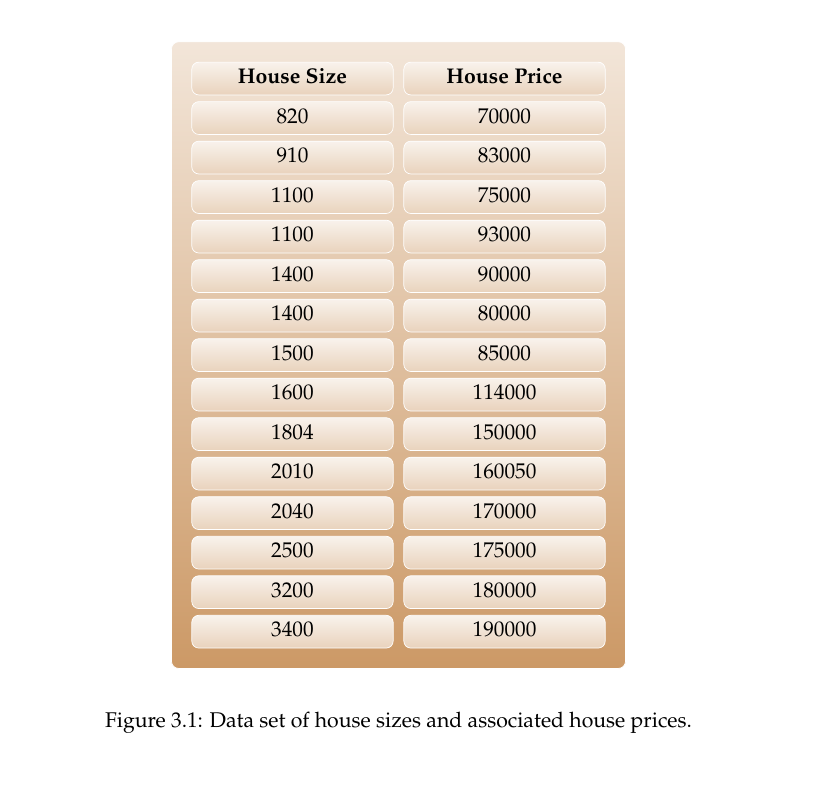

Tenemos el siguiente  sistema
Ajustamos los datos a un recta con pendiente $\theta_1$ y
interpecto $\theta_0$.

\begin{eqnarray}
y_1 &=& \theta_0 + \theta_1 x_1 \\
y_2 &=& \theta_0 + \theta_1 x_2 \\
\vdots &=& \vdots  \\
y_m &=& \theta_0 + \theta_1 x_m
\end{eqnarray}
Podemos escribir esto en forma matricial


\begin{eqnarray}
\begin{pmatrix}
1 & 820 \\
1 & 910 \\
1 & 1100 \\
\vdots & \vdots \\
1 & 3400
\end{pmatrix}
\begin{pmatrix}
\theta_0  \\
\theta_1
\end{pmatrix}
=\begin{pmatrix}
 70000 \\
 83000 \\
 75000 \\
 \vdots \\
 19000
\end{pmatrix}
\end{eqnarray}
Este es $X \theta = y$, donde $X$ es la matriz de la izquierda,
y $y$ la derecha, y $\theta=[\theta_0, \theta_1]^T$.

Si quisieramos ver el problema de forma gafica, observe

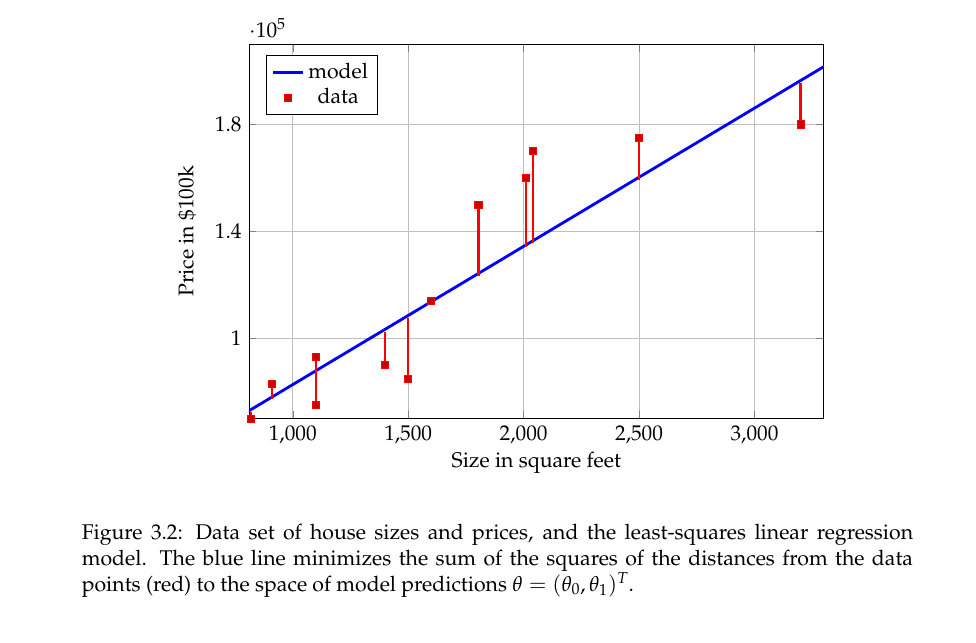

Queremos minimizar.

$$ \sum_{i=1}^m (y_i - x_i^T \theta)^2 =
 \| X \theta - y \|^2 .$$
 donde $x_i \rightarrow (1, x_i)$

La pregunta es como resovemos este problema.
Existen muchas formas de resolverlo. Comencemos por la mas obvia, con el background que ya tenemos.

El problema es: $X \theta = y$, usamos las ecuacion normales

$$ X^T X \theta = X^T y$$.
llame $b= X^T y$, y resuelva $X^T X \theta = b$.
La solucion es $\theta = (X^T X)^{-1} X^T y.$
Veamoslo en Python.


In [1]:
pwd

'/content'

In [2]:
ls

sample_data/


In [3]:
cat house_size_price.csv


cat: house_size_price.csv: No such file or directory


In [4]:
import matplotlib.pyplot as plt
import numpy as np
file_path = "./house_size_price.csv"

data = np.genfromtxt(file_path, dtype=float, delimiter=",")

FileNotFoundError: ignored

In [ ]:
print(data)

In [5]:
size_ar = data[:,0] # area de la casa
price_ar = data[:,1] # el precio
n = size_ar.size

# creamos la columa de unos
ones_ar = np.ones(shape=(n,1), dtype='float64')


# matrix X
X = np.column_stack((ones_ar, size_ar))
print(X)

NameError: ignored

In [6]:
XT = X.transpose()
XTX = XT.dot(X)  # multiplicacion de matrices
XTXInv = np.linalg.inv(XTX)
b =XT.dot(price_ar)
theta =XTXInv.dot(b)


# crear la linea de regresion
def f(x):
    return theta[1]*x + theta[0]

# graficamos
plt.scatter(size_ar, price_ar)
plt.plot(size_ar, f(size_ar), c='k')
plt.title("regresion lineal")
plt.xlabel("area")
plt.ylabel("precio")


NameError: ignored

Si $X^T X$ es invertible, la pseudoinversa es
$(X^T X)^{-1} X^T$. Verifiquemos

In [ ]:
XTXInvXT = XTXInv.dot(XT)
print("XTXInvXT", XTXInvXT)

In [ ]:
Pseudoinversa= np.linalg.pinv(X)
print("Pseudoinversa", np.linalg.pinv(X))

In [ ]:
Pseudoinversa == XTXInvXT

In [ ]:
print( Pseudoinversa - XTXInvXT)

In [ ]:
print(theta)

In [ ]:
mi_area = 1000
precio= np.array([[1, mi_area]]).dot(theta)
print("el precio de mi casa es", precio)

In [ ]:
print(XTX)

Encontramos (revisar en Python) que

\begin{eqnarray}
\theta_0 = 30994.74 \\
\theta_1 = 51.69
\end{eqnarray}
Entonces ya podemos calcular el precio justo de nuestra casa


A esto se le llama hipotesis, con $x=area$.

$$ h(\theta, x) = (1  \quad x )  \binom{\theta_0}{\theta_1}=82686.30228522 .$$

Hay mas maneras de resolver este problema?
El metodo de las ecuaciones normales es efectivo, pero si tienes un millon de ecuaciones estas en problemas. Hay metodos muy
efectivos para problemas enormes y con "huecos" (sparse matrices).


# Metodos de descenso con gradiente.
Voy a listar una serie de metodos importantes para resolver el problema $X \theta = y$.



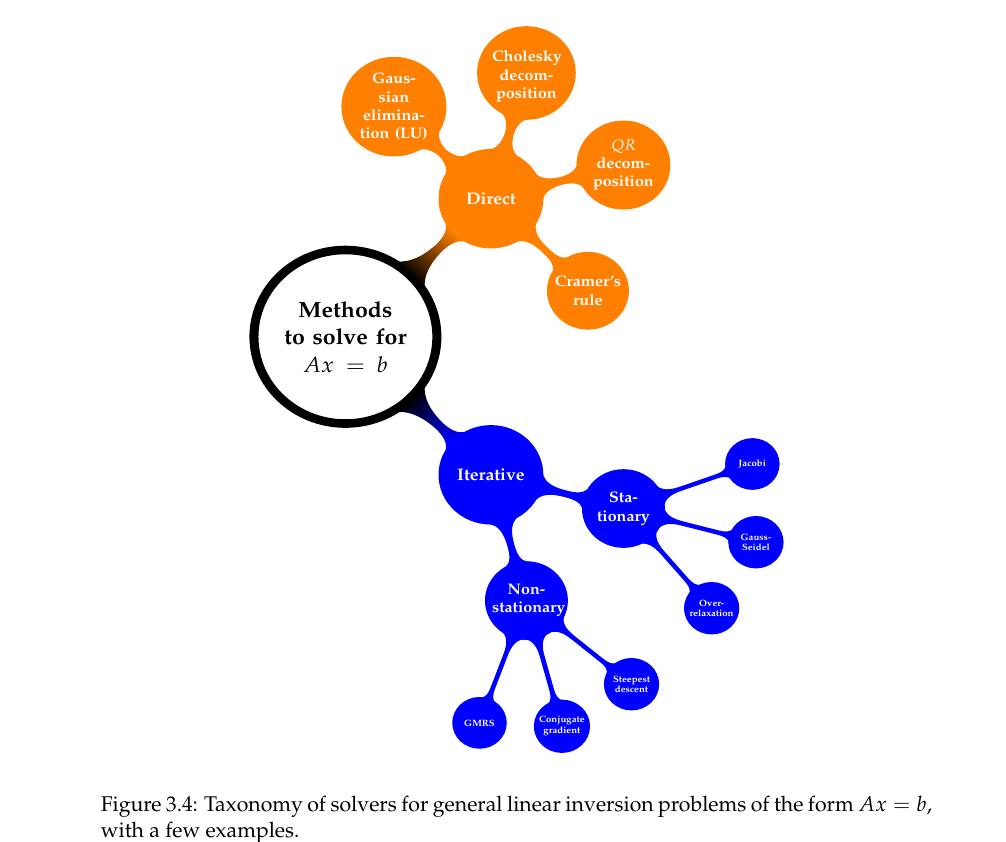

Piense que $A=X^T X$, y si no es invertible piense en $A=(X^T X+ \lambda I)$, en cualquier caso $A$ debe ser simetrica y positiva definidas.
Los metodos estacionarios descomponent la matriz $A$ en tres partes
$A= L + D + U$, donde $L$ es triangular inferior, $D$ es diagonal y $U$ triangular superior. De aca salen los metodos de Jacobi, Gauss Siedel, Over-relaxion.

Los metodos no estacionarios hacen que la matriz $A$ este cambiando a cada iteracion.

En los metodos no estacionarios hablamos de metodos de descenso de gradiente.

Por completez en el curso hablamos de otros metodos que no se ajustan a estas taxonomias.




* Simulating annealing: Son buenos para hallar maximos globales, no se ven en este curso.
* Pattern search: no requiere de gradiente. Se usan algunas veces en ANN: Artifical Neural Networks.

Metodos evolutivos (basados en  la biologica)
* [Particle Swarm Optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization)
* Genetic Algoritms.



Los que mas se usan en ML son los metodos de gradiente que explicamos enseguida.

Recordemos un poco el problema que queremos resolver y los escribimos como una funcion objetivo (de costo)


$$ J =  \frac12 \| X \theta - y \|^2 =\frac12 \| h(\theta, x) - y \|^2 = \frac12 \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i)^2 .$$

Vamos a querer hallar el gradiente $\nabla J$. Por que es un problema de optimizacion y queremos hallar el minimo.

La derivada direccional de un campo escalar (varias variables)


$$  \frac{\partial J}{\partial u} = \nabla J \cdot u .$$`
Podemos escribir $\nabla \cdot u = \| \nabla J \| \cos \beta $
por que $\| u \|=1$. Entonces la direccion de mayor ascenso
es cuando $\beta=0$, a lo largo del gradiente, y la de maximo es cuando $\beta =\pi$, y da


$$ u = - \frac{\nabla J}{\| \nabla j \|} .$$

Una vez tengamos el gradiente de la funcion lo podemos usar para descender al minimo de forma iterativa. Vamos a ver un ejercicio en Python para visualizar lo que pasa y en la proxima clase hacemos un poco de teoria sobre estos algoritmos.


La ecuacion clave en el descenso es:

$$ \theta^{(i)}= \theta^{(i-1)} - \alpha \nabla f(\theta^{(i-1)})  .$$





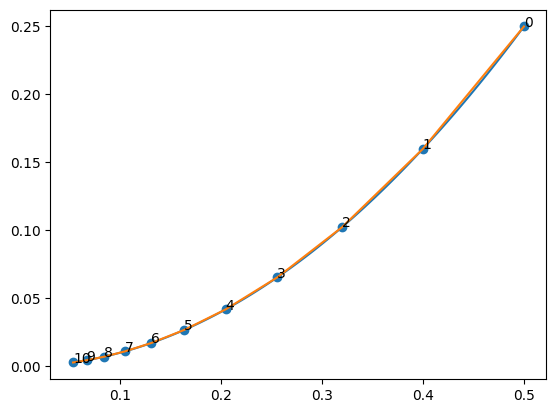

In [7]:
import numpy
import matplotlib.pyplot as plt

def gradientDescent(f, gradf, x, alpha, M):
    # f funcion a minimizar
    # x, valor inicial
    # alpha: "learning parameter"
    # M maximo numero de iteraciones

    x_0=x
    # lista de puntos
    xlist = [x]
    ylist = [f(x)]


    for i in range(M):
        x = x - alpha*gradf(x)
        xlist.append(x)
        ylist.append(f(x))


    N=100
    # grafiquemos
    xdomain = np.linspace(min(xlist), max(xlist),N)
    plt.plot(xdomain, f(xdomain))
    plt.plot(xlist, ylist)

    plt.scatter(xlist, ylist)

    # plt.quiver muestra flechas, pero no
    # etiquetas
    xarr = np.array(xlist)
    yarr = np.array(ylist)
    n = len(xarr)
    for i in range(n):
        plt.annotate(i, (xarr[i], yarr[i]))

    return


def f(x):
    return x**2


def gradf(x):
    return 2*x

M=10
alpha=0.1
x=0.5

gradientDescent(f, gradf, x, alpha, M)





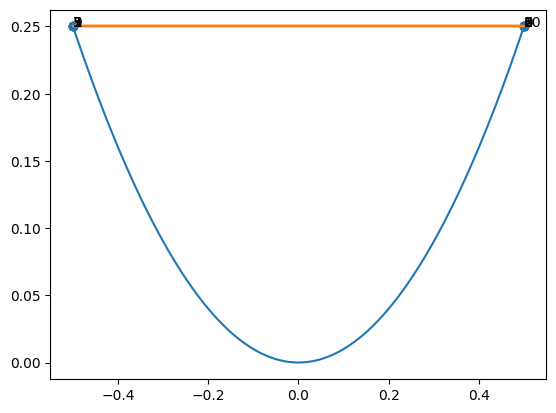

In [8]:
alpha = 1.0
gradientDescent(f, gradf, x, alpha, M)

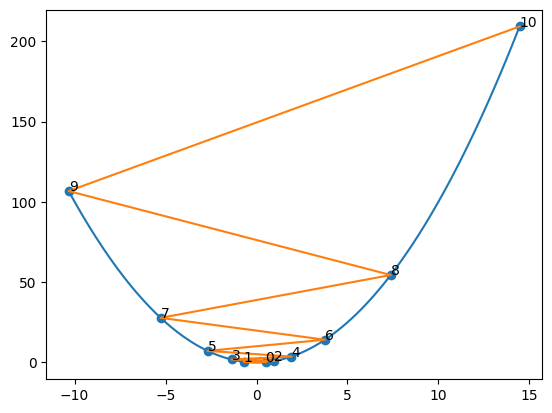

In [9]:
alpha = 1.2
gradientDescent(f, gradf, x, alpha, M)

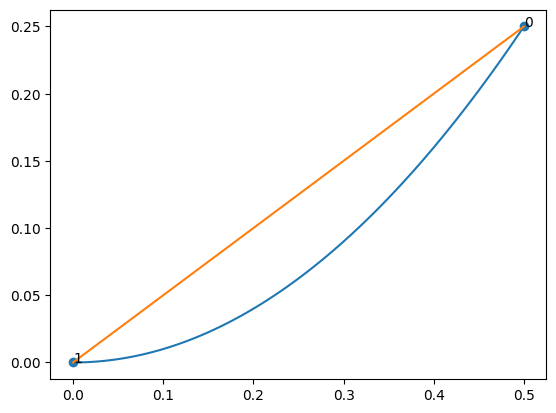

In [10]:

alpha = 0.5
M=1
gradientDescent(f, gradf, x, alpha, M)

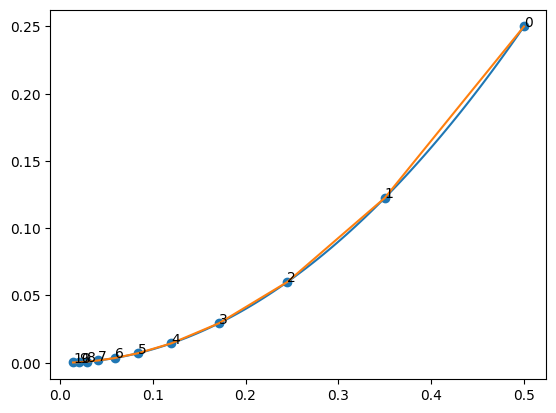

In [18]:

alpha = 0.15
M=10
gradientDescent(f, gradf, x, alpha, M)


In [ ]:
alpha = 3.5
M=10
gradientDescent(f, gradf, x, alpha, M)

Existe un $\alpha$ optimio para este en particular
Se puede probar (ejercicio para el estudiante)
que

$$ f(x_0 - \alpha f'(x_0))=0.$$
entonces $\alpha$ es optimo y llegamos en **un paso** al minimo.

Para este caso

Si $r$ es una raiz de $f$ entonces

$$ x_0 - \alpha f'(x_0)=0.$$

$$ \alpha= \frac{x_0}{f'(x_0)} .$$

y para $f(x)=x^2$, entonces $\alpha=x_0/(2x_0)= 1/2$, $x_0 \ne 0$.




# Proxima clase: Metodo de Steepest Descent.